In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
df = train_df.copy()
test = test_df.copy()

In [4]:
df

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
...,...,...,...,...,...,...
136945,136945,2021-12-31,Spain,Kagglazon,Using LLMs to Improve Your Coding,700
136946,136946,2021-12-31,Spain,Kagglazon,Using LLMs to Train More LLMs,752
136947,136947,2021-12-31,Spain,Kagglazon,Using LLMs to Win Friends and Influence People,111
136948,136948,2021-12-31,Spain,Kagglazon,Using LLMs to Win More Kaggle Competitions,641


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        136950 non-null  int64 
 1   date      136950 non-null  object
 2   country   136950 non-null  object
 3   store     136950 non-null  object
 4   product   136950 non-null  object
 5   num_sold  136950 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 6.3+ MB


* **There is no NaN values.**
* **Train dataset contains `136950` rows**
* **Column "date" has type `object` instead of `datetime`**

In [6]:
# Date to datetime
df['date'] = pd.to_datetime(df['date'])
test['date'] = pd.to_datetime(test['date'])

In [7]:
df.describe(include='all',datetime_is_numeric=True)

,id,date,country,store,product,num_sold
count,136950.00000,136950,136950,136950,136950,136950.000000
unique,NaN,NaN,5,3,5,NaN
top,NaN,NaN,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,NaN
freq,NaN,NaN,27390,45650,27390,NaN
mean,68474.50000,2019-07-02 12:00:00,NaN,NaN,NaN,165.522636
min,0.00000,2017-01-01 00:00:00,NaN,NaN,NaN,2.000000
25%,34237.25000,2018-04-02 00:00:00,NaN,NaN,NaN,46.000000
50%,68474.50000,2019-07-02 12:00:00,NaN,NaN,NaN,98.000000
75%,102711.75000,2020-10-01 00:00:00,NaN,NaN,NaN,184.000000
max,136949.00000,2021-12-31 00:00:00,NaN,NaN,NaN,1380.000000


* **Dataset contains values from `2017-01-01` to `2021-12-31`**
* **Dataset contains information about `5` countries**
* **Dataset contains information about `3` different stores**
* **Dataset contains information about `5` different products**
* **Min number of sold products is `2`. Max value is `1380`. Mean value is `165.5`**( probably data has outliers because **standart deviation** is `183.69` ).

In [8]:
# Check if any dates is missing
all_dates = pd.date_range(start=df.date.min(), end = df.date.max(),freq='D')

set(all_dates) - set(df.date)

set()

**There is no missing dates**

Dataset contains information about days between `2017-01-01` and `2021-12-31` = 5 years

In [9]:
df.country.unique()

array(['Argentina', 'Canada', 'Estonia', 'Japan', 'Spain'], dtype=object)

In [10]:
df.groupby('country')['num_sold'].agg(['mean','sum','count'])

,mean,sum,count
country,,,
Argentina,61.454691,1683244,27390
Canada,256.046513,7013114,27390
Estonia,130.606754,3577319,27390
Japan,219.561373,6013786,27390
Spain,159.943848,4380862,27390


* Dataset contains **equal number of values for each country**. It means that data is **balanced**.
* **Highest** number of sold products in `Canada` and **lowest** in `Argentina`

In [11]:
df.groupby(['country','store'])['num_sold'].agg(['mean','sum','count'])

mean      sum  count
country   store                                   
Argentina Kagglazon     127.669880  1165626   9130
          Kaggle Learn   22.236364   203018   9130
          Kaggle Store   34.457831   314600   9130
Canada    Kagglazon     530.374808  4842322   9130
          Kaggle Learn   93.551698   854127   9130
          Kaggle Store  144.213034  1316665   9130
Estonia   Kagglazon     270.789595  2472309   9130
          Kaggle Learn   47.578204   434389   9130
          Kaggle Store   73.452464   670621   9130
Japan     Kagglazon     455.056955  4154670   9130
          Kaggle Learn   80.122453   731518   9130
          Kaggle Store  123.504710  1127598   9130
Spain     Kagglazon     331.479518  3026408   9130
          Kaggle Learn   58.366046   532882   9130
          Kaggle Store   89.985980   821572   9130

In [12]:
df.groupby('store')['num_sold'].agg(['mean','sum','count'])

,mean,sum,count
store,,,
Kagglazon,343.074151,15661335,45650
Kaggle Learn,60.370953,2755934,45650
Kaggle Store,93.122804,4251056,45650


* Dataset contains **equal number of values for each store in each country**.
* **Highest** number of sold products in `Canada - Kagglazon` and **lowest** in `Argentina - Kaggle Store`
* Every store in `Canada` has **higher number** of sold products then in other countries. Maybe it depends on population or average salary in this countries ( to define it I have to make a researh and I don't want to &#128512; )
* Kagglazon has a lot more number of solds then Kaggle Store and Kaggle Learn

In [13]:
df.groupby(['store','product'])['num_sold'].agg(['mean','sum','count'])

mean  \
store        product                                                      
Kagglazon    Using LLMs to Improve Your Coding               459.045126   
             Using LLMs to Train More LLMs                   453.414129   
             Using LLMs to Win Friends and Influence People   70.979518   
             Using LLMs to Win More Kaggle Competitions      383.553122   
             Using LLMs to Write Better                      348.378861   
Kaggle Learn Using LLMs to Improve Your Coding                80.978861   
             Using LLMs to Train More LLMs                    79.954545   
             Using LLMs to Win Friends and Influence People   12.171742   
             Using LLMs to Win More Kaggle Competitions       67.466484   
             Using LLMs to Write Better                       61.283133   
Kaggle Store Using LLMs to Improve Your Coding               124.738445   
             Using LLMs to Train More LLMs                   123.145564   
             Using LLMs to Win Friends and Influence People   18.991566   
             Using LLMs to Win More Kaggle Competitions      104.107777   
             Using LLMs to Write Better                       94.630668   

                                                                 sum  count  
store        product                                                         
Kagglazon    Using LLMs to Improve Your Coding               4191082   9130  
             Using LLMs to Train More LLMs                   4139671   9130  
             Using LLMs to Win Friends and Influence People   648043   9130  
             Using LLMs to Win More Kaggle Competitions      3501840   9130  
             Using LLMs to Write Better                      3180699   9130  
Kaggle Learn Using LLMs to Improve Your Coding                739337   9130  
             Using LLMs to Train More LLMs                    729985   9130  
             Using LLMs to Win Friends and Influence People   111128   9130  
             Using LLMs to Win More Kaggle Competitions       615969   9130  
             Using LLMs to Write Better                       559515   9130  
Kaggle Store Using LLMs to Improve Your Coding               1138862   9130  
             Using LLMs to Train More LLMs                   1124319   9130  
             Using LLMs to Win Friends and Influence People   173393   9130  
             Using LLMs to Win More Kaggle Competitions       950504   9130  
             Using LLMs to Write Better                       863978   9130

In [14]:
df.groupby('product')['num_sold'].agg(['mean','sum','count'])

,mean,sum,count
product,,,
Using LLMs to Improve Your Coding,221.587477,6069281,27390
Using LLMs to Train More LLMs,218.838080,5993975,27390
Using LLMs to Win Friends and Influence People,34.047609,932564,27390
Using LLMs to Win More Kaggle Competitions,185.042461,5068313,27390
Using LLMs to Write Better,168.097554,4604192,27390


<AxesSubplot:xlabel='num_sold', ylabel='product'>

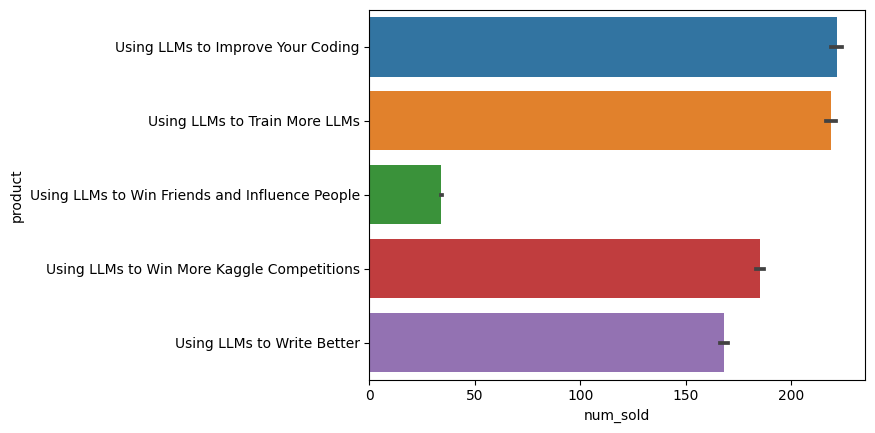

In [15]:
sns.barplot(y='product',x='num_sold',data=df)
#plt.xticks(rotation = 90)

* Every of these stores has the same products
* `Using LLMs to Improve Your Coding` - is the best-selling product and `Using LLMs to Win Friends and Influence People` - is the least sold.
* Every product is a course about LLMs ( Large language model )

### Creating new features from date such as `year`, `month` and `quarter`.

In [18]:
def add_date_features(data):
    data = data.copy()
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['year'] = data['date'].dt.year
    data['dayofweek'] = data['date'].dt.dayofweek
    data['quarter'] = data['date'].dt.quarter
    data['dayofmonth'] = data['date'].dt.day
    data['weekofyear'] = data['date'].dt.weekofyear
    
    return data

df = add_date_features(df)
test = add_date_features(test)

c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  if __name__ == "__main__":


In [19]:
df.head(10)

,id,date,country,store,product,num_sold,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,1,1,2017,6,1,1,52
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,1,1,2017,6,1,1,52
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,1,1,2017,6,1,1,52
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,1,1,2017,6,1,1,52
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,1,1,2017,6,1,1,52
5,5,2017-01-01,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88,1,1,2017,6,1,1,52
6,6,2017-01-01,Argentina,Kaggle Store,Using LLMs to Train More LLMs,98,1,1,2017,6,1,1,52
7,7,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win Friends and Influence People,14,1,1,2017,6,1,1,52
8,8,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win More Kaggle Competitions,83,1,1,2017,6,1,1,52
9,9,2017-01-01,Argentina,Kaggle Store,Using LLMs to Write Better,69,1,1,2017,6,1,1,52


Text(0.5, 1.0, 'Number of solds in every Month')

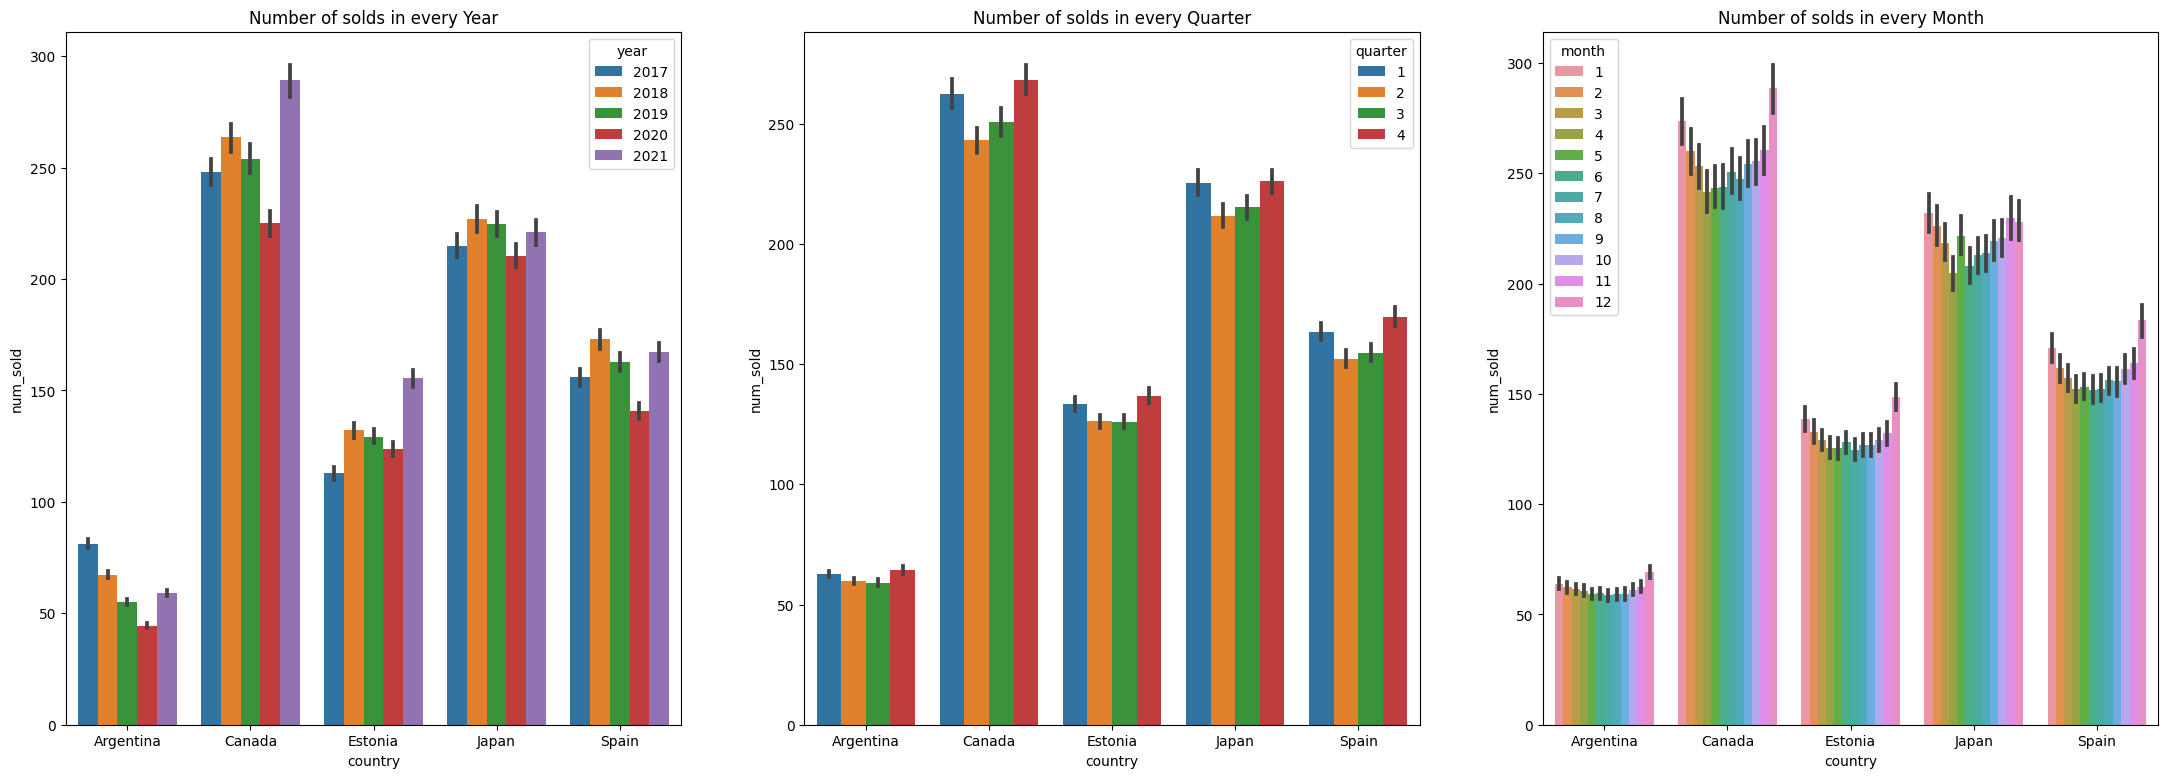

In [62]:
# Number of solds in each country by year, quarter and month respectively
plt.figure(figsize=(27,9))
plt.subplot(1,3,1)
sns.barplot(x='country',y='num_sold',hue='year',data=df)
plt.title('Number of solds in every Year')

plt.subplot(1,3,2)
sns.barplot(x='country',y='num_sold',hue='quarter',data=df)
plt.title('Number of solds in every Quarter')

plt.subplot(1,3,3)
sns.barplot(x='country',y='num_sold',hue='month',data=df)
plt.title('Number of solds in every Month')

**As a result**
* `Year 2020` was not good for every country ( probably because of the COVID-19 )
* `Summer and autumn` are the least selling quarters but still difference is not so big

Text(0.5, 1.0, 'Number of solds in every Month')

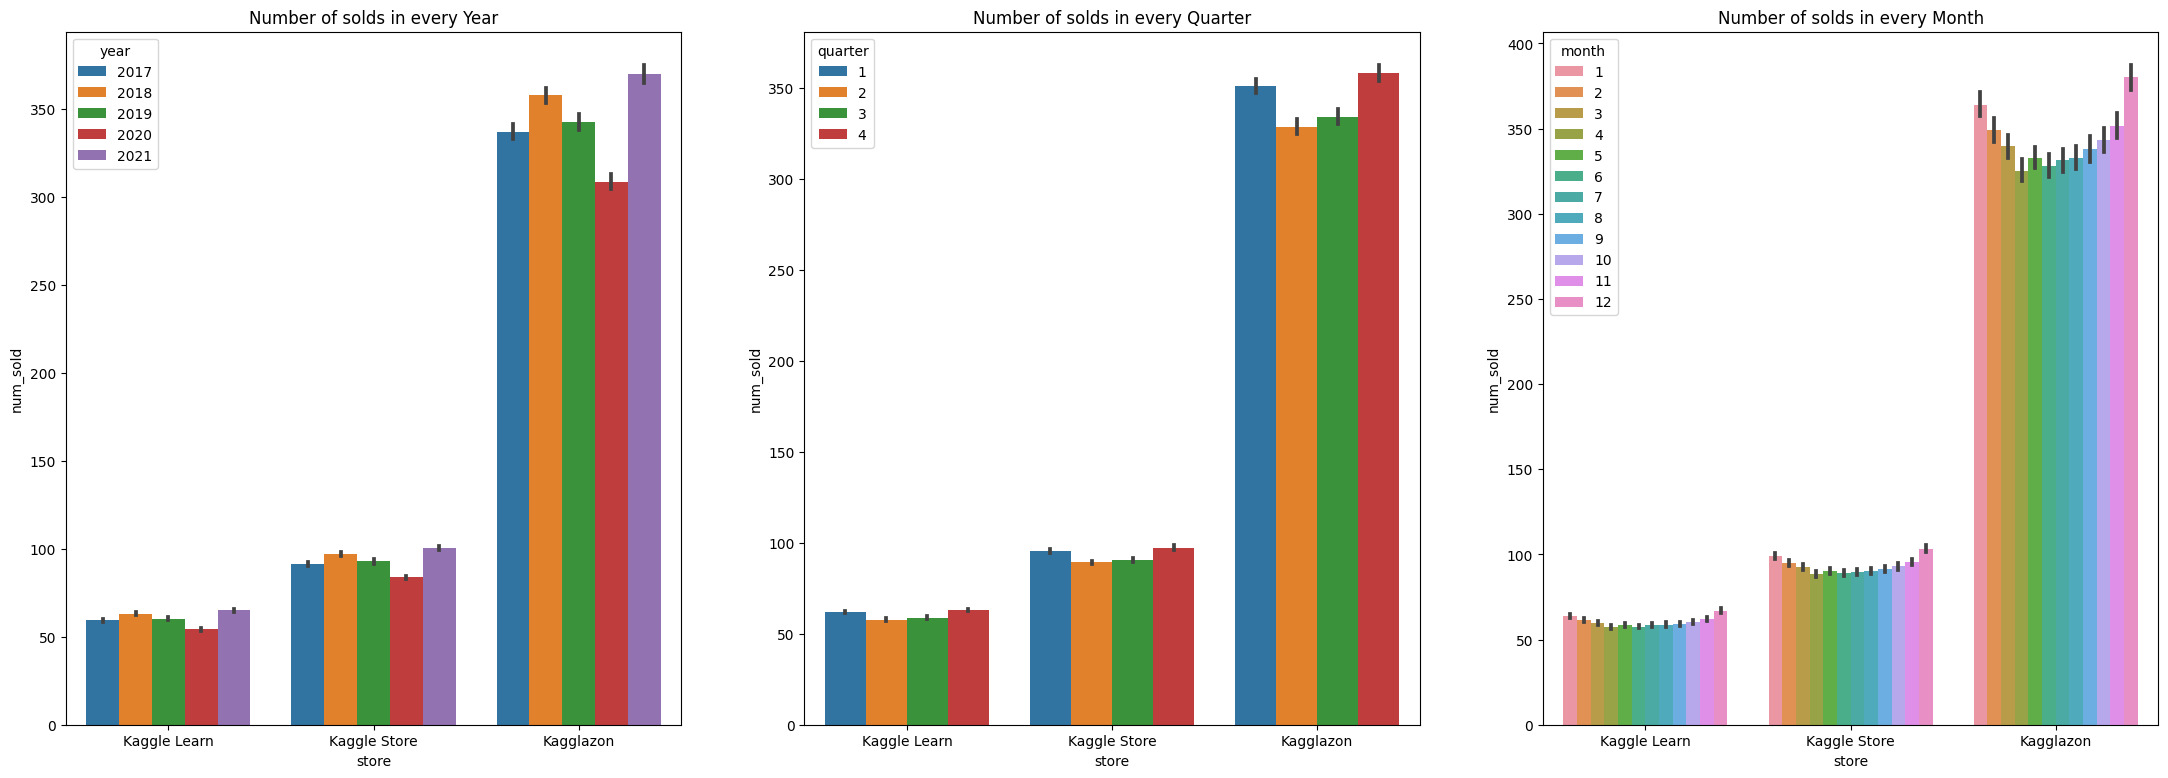

In [67]:
# Number of solds in each store by year, quarter and month respectively
plt.figure(figsize=(27,9))
plt.subplot(1,3,1)
sns.barplot(x='store',y='num_sold',hue='year',data=df)
plt.title('Number of solds in every Year')

plt.subplot(1,3,2)
sns.barplot(x='store',y='num_sold',hue='quarter',data=df)
plt.title('Number of solds in every Quarter')

plt.subplot(1,3,3)
sns.barplot(x='store',y='num_sold',hue='month',data=df)
plt.title('Number of solds in every Month')

**As a result**

The same situation as was with countries:
* `Year 2020` was not good for every store ( probably because of the COVID-19 )
* `Summer and autumn` are the least selling quarters but still difference is not so big

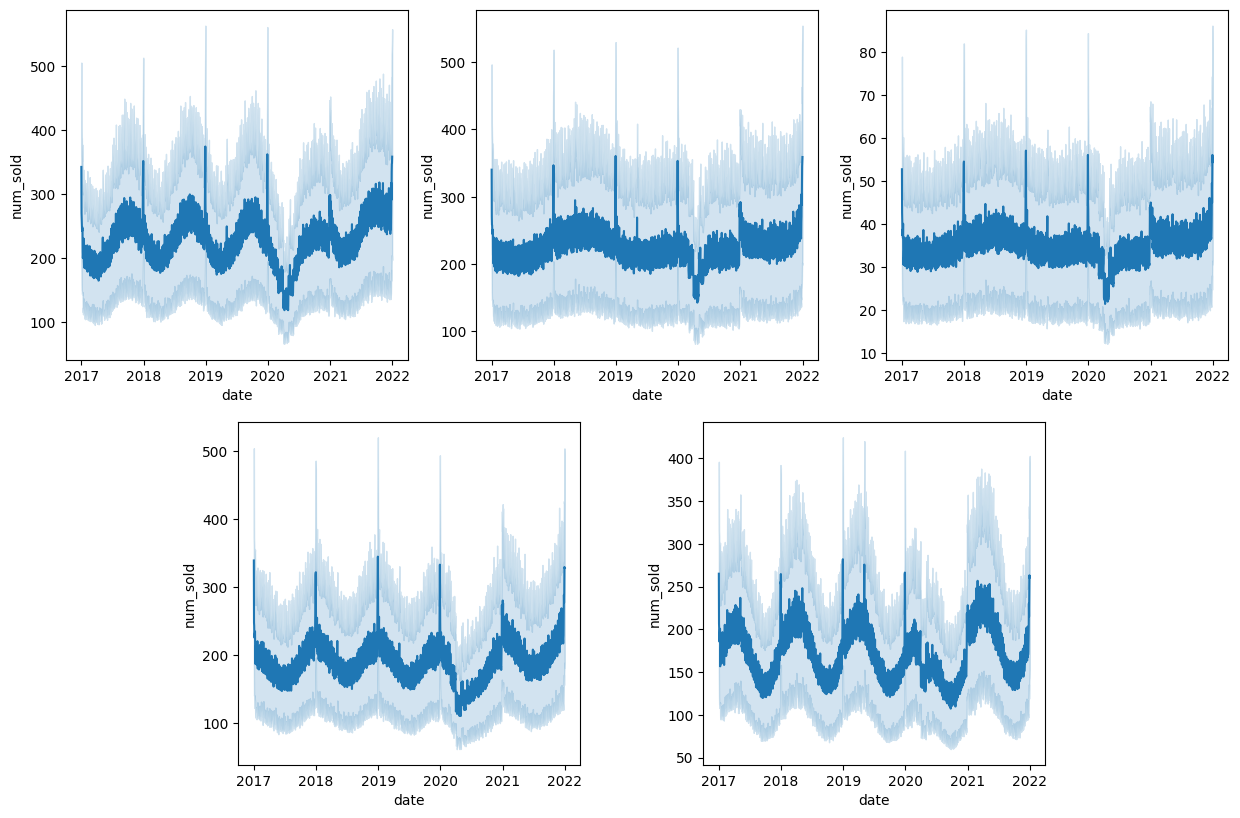

In [90]:
#Let's see the lineplot for every product by the date

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(15,10))
ax6.set_visible(False)

ax4.set_position([0.24,0.125,0.228,0.343])
ax5.set_position([0.55,0.125,0.228,0.343])

axes = [ax1,ax2,ax3,ax4,ax5]
all_products = df['product'].unique()

for i in range(len(axes)):
    sns.lineplot(x=df['date'],
                 y=df[df['product'] == all_products[i]]['num_sold'],
                 ax=axes[i])
    
    plt.title(all_products[i])
    plt.xlabel('Date')
    plt.ylabel('Number of sold')

**As a result**
* Situation in 2017-2020 almost the same for each product
* In 2020 exist a little drop in number of solds. Something happened in the middle of the year.
* All the products saved a tend after 2020-drop

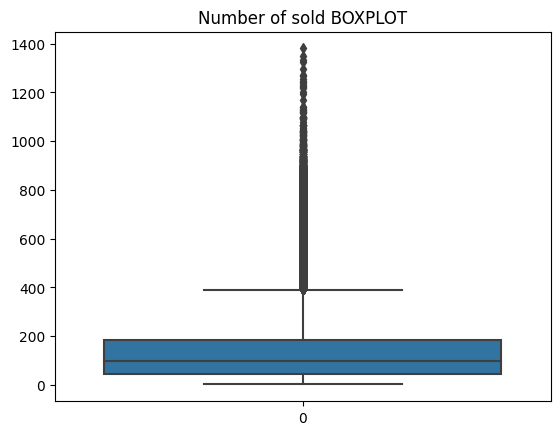

In [19]:
# Outliers
sns.boxplot(df['num_sold'])
plt.title('Number of sold BOXPLOT')

plt.show()

# Dealing with outliers

# Detect and transform
def detect_outliers_iqr(data):
    data = data.copy()
    q1 = np.percentile(data['num_sold'], 25)
    q3 = np.percentile(data['num_sold'], 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    def transform_outliers(row):
        if row['num_sold'] < lwr_bound:
            row['num_sold'] = lwr_bound
            
        elif row['num_sold'] > upr_bound:
            row['num_sold'] = upr_bound
            
        return row
    
    return data.apply(transform_outliers,axis=1)

df = detect_outliers_iqr(df)

df.head()

# Outliers
sns.boxplot(df['num_sold'])
plt.title('Number of sold BOXPLOT \nAfter transform')

plt.show()

# Label encoding

### Define numerical and categorical columns

In [28]:
df.dtypes

id                     int64
date          datetime64[ns]
country               object
store                 object
product               object
num_sold               int64
month                  int64
day                    int64
year                   int64
dayofweek              int64
quarter                int64
dayofmonth             int64
weekofyear             int64
dtype: object

In [29]:
numeric_features = list(df.select_dtypes(include=['int','float']).columns) + ['date']
categorical_features = list(df.select_dtypes('object').columns)

### Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
ohe = LabelEncoder()

In [33]:
for i in range(len(categorical_features)):
    ohe.fit(df[categorical_features[i]])
    df.loc[:,categorical_features[i]] = ohe.transform(df[categorical_features[i]])
    test.loc[:,categorical_features[i]] = ohe.transform(test[categorical_features[i]])

In [34]:
df.head(10)

,id,date,country,store,product,num_sold,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
0,0,2017-01-01,0,1,0,63,1,1,2017,6,1,1,52
1,1,2017-01-01,0,1,1,66,1,1,2017,6,1,1,52
2,2,2017-01-01,0,1,2,9,1,1,2017,6,1,1,52
3,3,2017-01-01,0,1,3,59,1,1,2017,6,1,1,52
4,4,2017-01-01,0,1,4,49,1,1,2017,6,1,1,52
5,5,2017-01-01,0,2,0,88,1,1,2017,6,1,1,52
6,6,2017-01-01,0,2,1,98,1,1,2017,6,1,1,52
7,7,2017-01-01,0,2,2,14,1,1,2017,6,1,1,52
8,8,2017-01-01,0,2,3,83,1,1,2017,6,1,1,52
9,9,2017-01-01,0,2,4,69,1,1,2017,6,1,1,52


# Correlation

<AxesSubplot:>

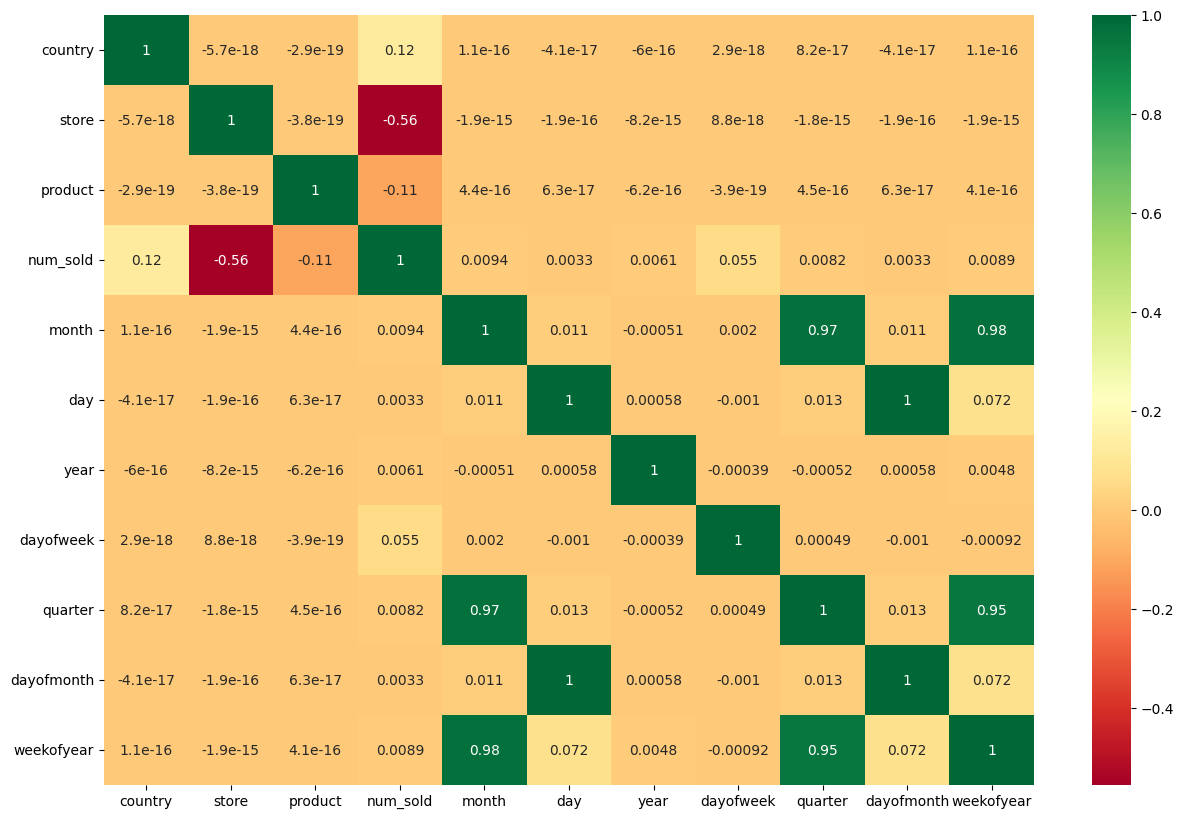

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df.drop('id',axis=1).corr(),annot=True,cmap='RdYlGn')

**As a result**
* Only `store` has good correlation with number of solds
* `country` and `product` have low correlation with target and `year`,`month` and `quarter` have lowest correaltion with target
* Good that there is no multicorrelation

### Creating some new features

In [36]:
df.head()

,id,date,country,store,product,num_sold,month,day,year,dayofweek,quarter,dayofmonth,weekofyear
0,0,2017-01-01,0,1,0,63,1,1,2017,6,1,1,52
1,1,2017-01-01,0,1,1,66,1,1,2017,6,1,1,52
2,2,2017-01-01,0,1,2,9,1,1,2017,6,1,1,52
3,3,2017-01-01,0,1,3,59,1,1,2017,6,1,1,52
4,4,2017-01-01,0,1,4,49,1,1,2017,6,1,1,52


In [37]:
def math_features(data):
    data = data.copy()
    data['month_sin'] = np.sin(2*np.pi*data.month/12)
    data['month_cos'] = np.cos(2*np.pi*data.month/12)
    data['day_sin'] = np.sin(2*np.pi*data.day/24)
    data['day_cos'] = np.cos(2*np.pi*data.day/24)
    data['month_sin_day_sin'] = data['month_sin'] * data['day_sin']
    data['month_sin_day_cos'] = data['month_sin'] * data['day_cos']
    data['month_cos_day_sin'] = data['month_cos'] * data['day_sin']
    data['month_cos_day_cos'] = data['month_cos'] * data['day_cos']
    return data

df = math_features(df)
test = math_features(test)

<AxesSubplot:>

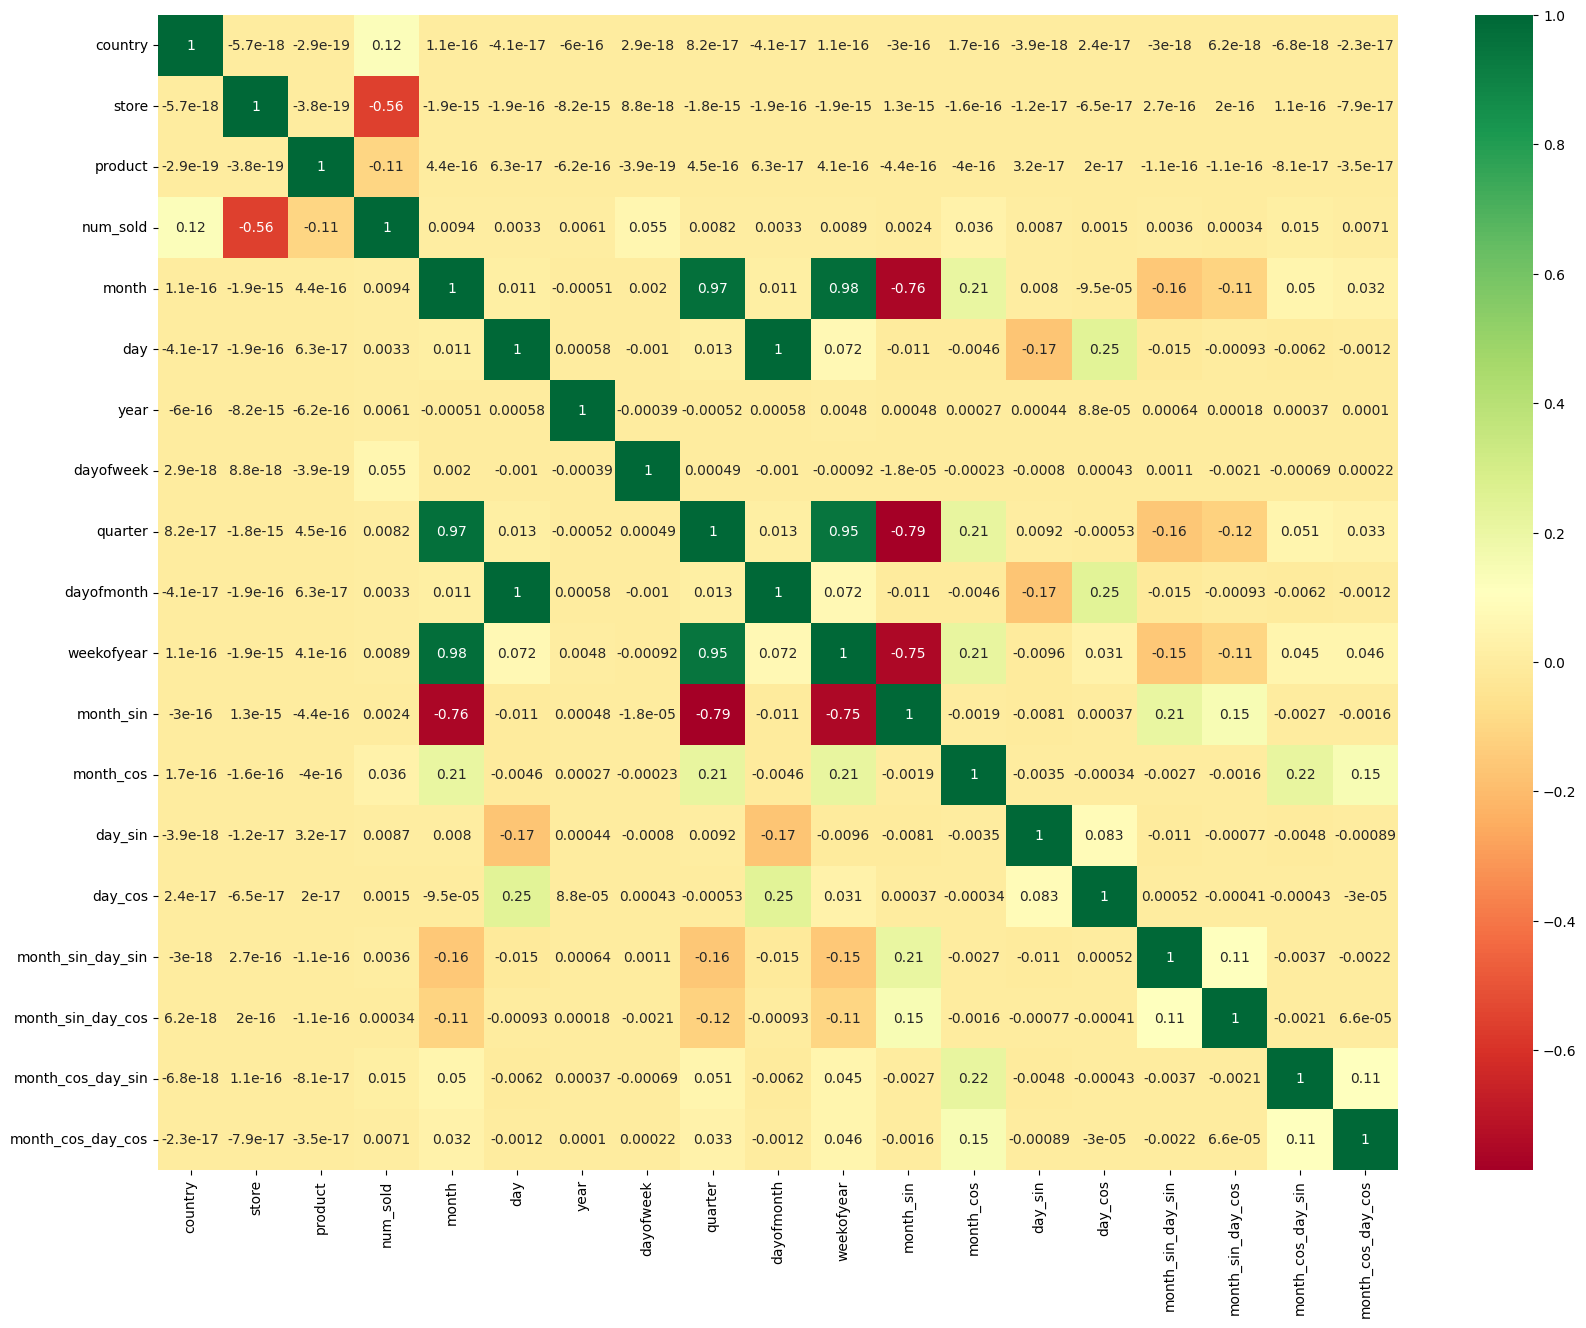

In [38]:
plt.figure(figsize=(20,15))
sns.heatmap(df.drop('id',axis=1).corr(),annot=True,cmap='RdYlGn')

### Standardizing

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
ss = StandardScaler()

df.loc[:,df.drop('num_sold',axis=1).select_dtypes('float').columns] = ss.fit_transform(df.drop('num_sold',axis=1).select_dtypes('float'))
test.loc[:,test.select_dtypes('float').columns] = ss.transform(test.select_dtypes('float'))

# Creating model

### Create `X` and `y`

In [42]:
X = df.drop(['id','date','num_sold'],axis=1)
y = df['num_sold']

<AxesSubplot:>

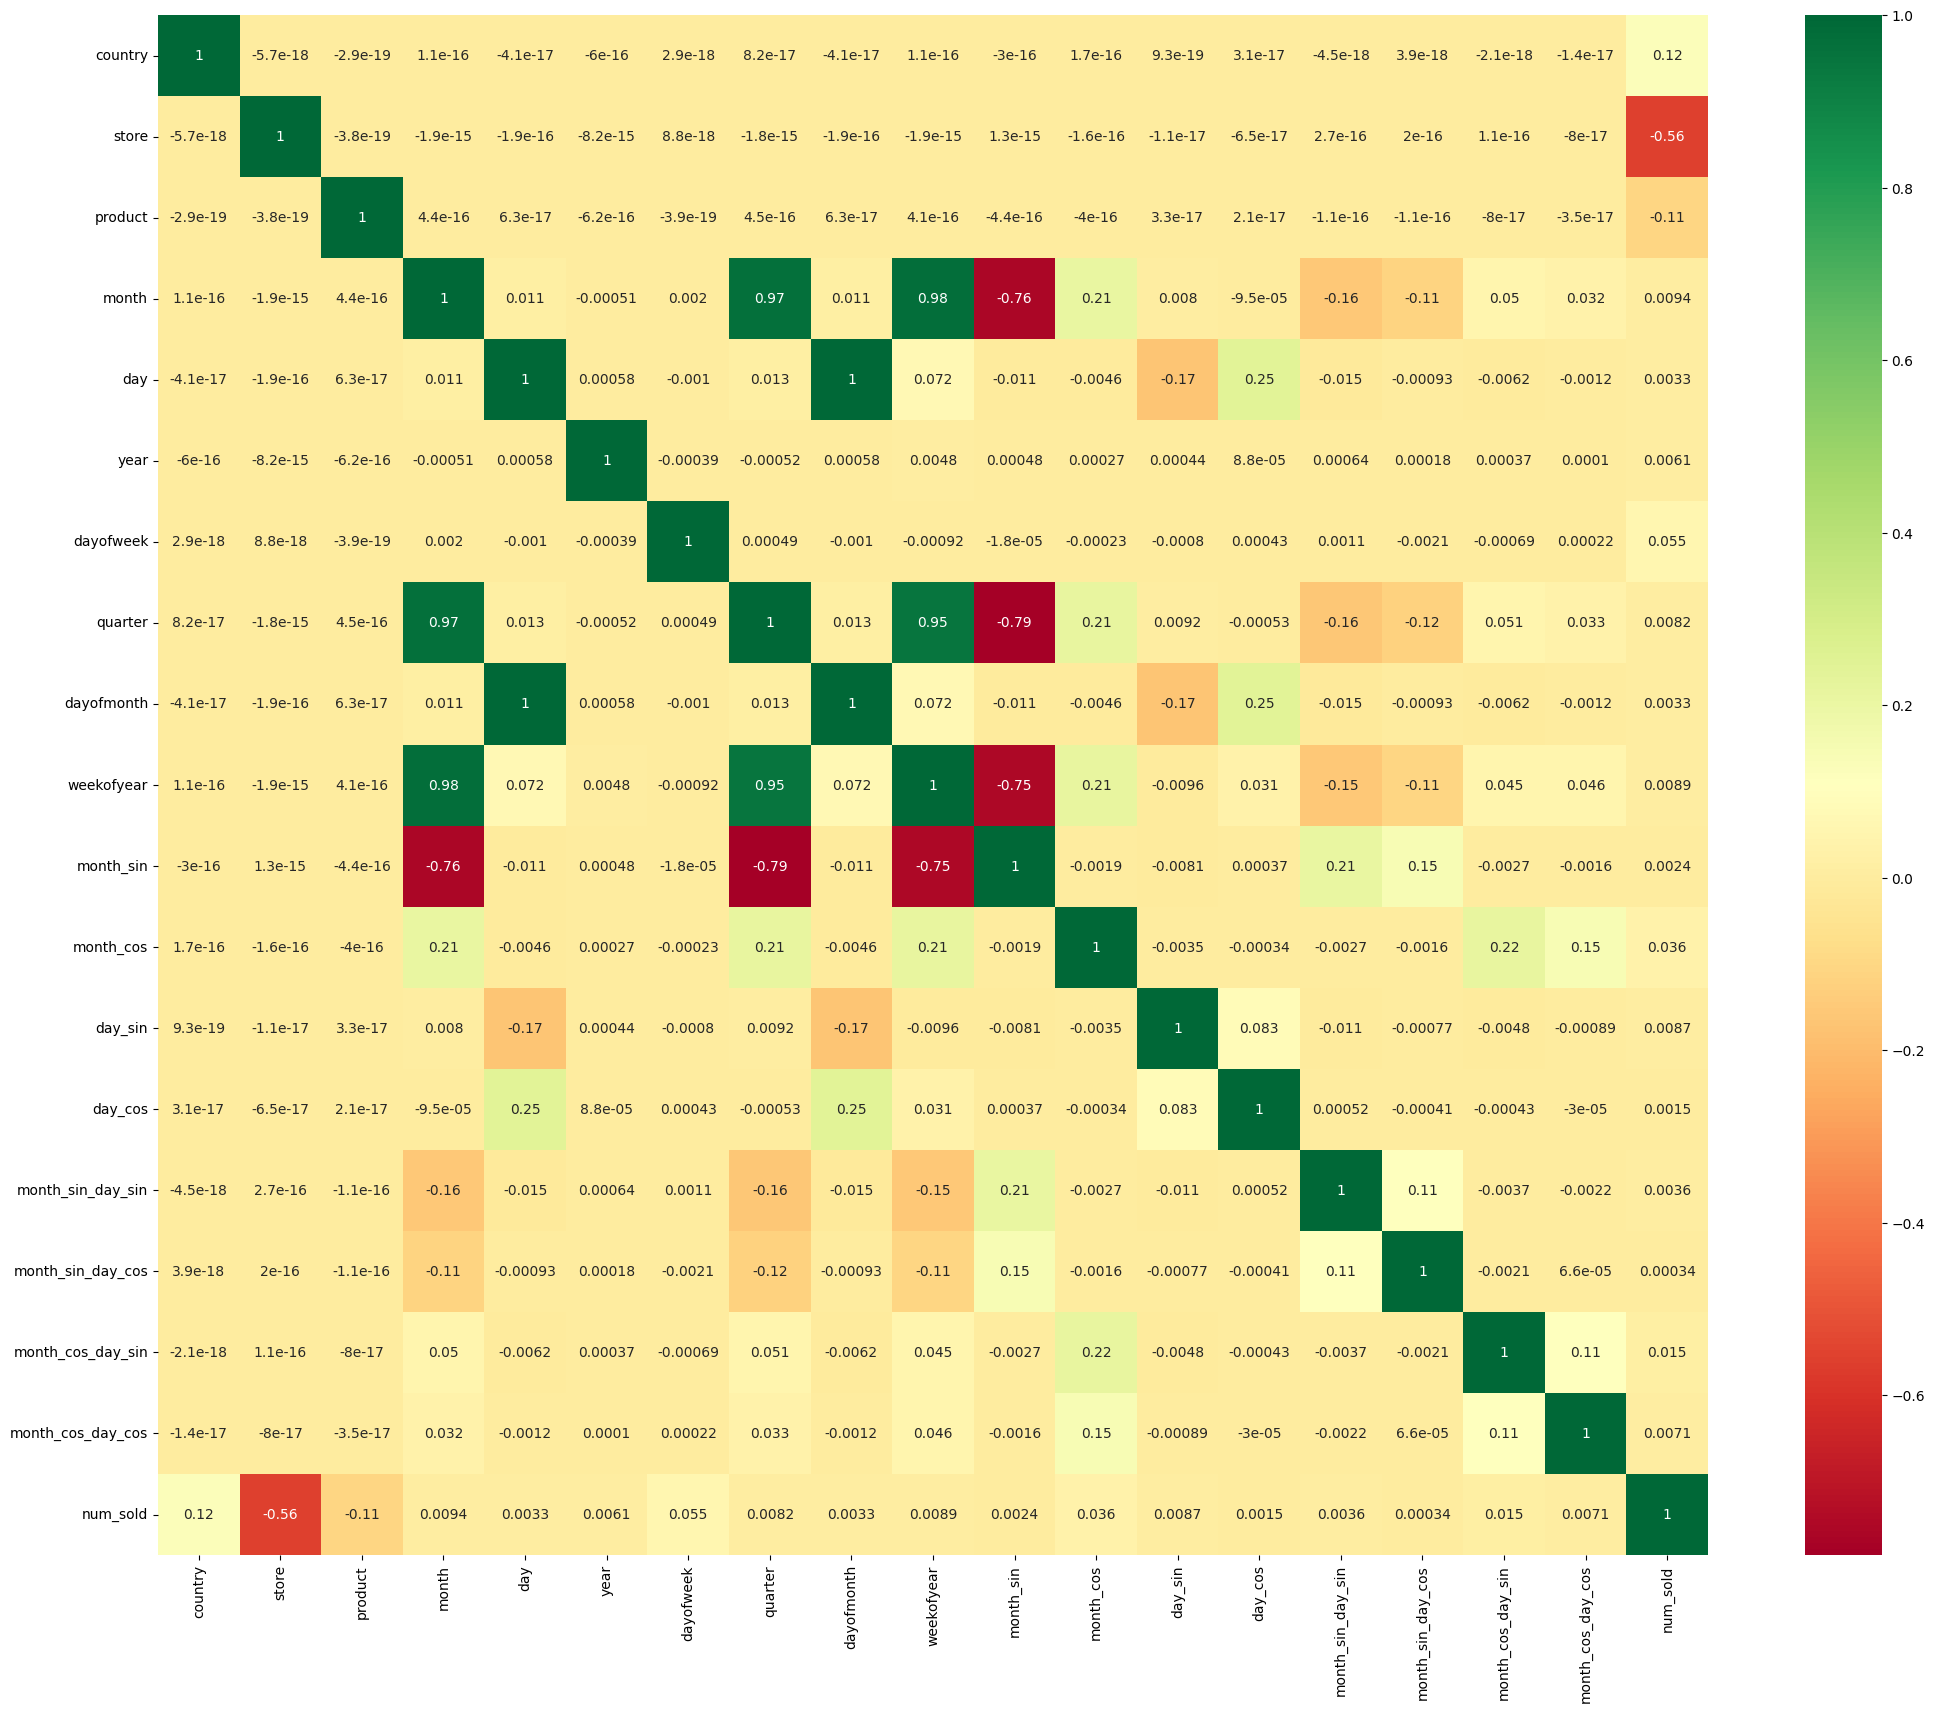

In [43]:
plt.figure(figsize=(25,20))
sns.heatmap(pd.concat([X,y],axis=1).corr(),annot=True,cmap='RdYlGn')

### Splitting data into training and testing

In [44]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.utils import shuffle

tscv = TimeSeriesSplit(n_splits=4)
scores = []
test_preds_res=[]
test_preds = np.zeros(len(test))
for fold,(train_index, test_index) in enumerate(tscv.split(X,y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(X_train.shape)

(27390, 18)
(54780, 18)
(82170, 18)
(109560, 18)


In [45]:
import random

In [46]:
n_reapts = 3
n_splits = 5
# Fix seed
random.seed(42)
random_state_list = random.sample(range(9999), n_reapts)

In [47]:
from sklearn.metrics import make_scorer

# SMAPE metric
def smape(y_true, y_pred):
    return 1 / len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true)) * 100)

smape_scorer = make_scorer(smape, greater_is_better=False)

In [48]:
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor

import time
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [41]:
# -
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "XGBoost": XGBRegressor(random_state=0, objective='reg:squarederror'),
    "KNN": neighbors.KNeighborsRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "CatBoost": CatBoostRegressor(verbose=False)
}

In [ ]:
# -
results = []

# Train and evaluate the classifiers
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Classifier": name,
        "Training Time": training_time,
        "Prediction Time": prediction_time,
        "Mean Squared Error": mse,
        "Mean Absolute Error, MAE": mae,
        "R2": r2
    })
    
    print(f"{name}:")
    print(f"  Training time: {training_time:.2f}s")
    print(f"  Prediction time: {prediction_time:.2f}s")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  Mean Absolute Error, MAE: {mae:.2f}s")
    print(f"  R2: {r2:.2f}s")
    
    print()

In [ ]:
# -
results_df = pd.DataFrame(results)
results_df.sort_values(by='R2')

**As a result**
* `CatBoost` and `XGBoost` have almost the same results

### Choose the best model

In our case we are choosing model between `CatBoost` and `XGBoost`

In [49]:
params={'n_estimators': 195, 'learning_rate': 0.07725732658711602, 'depth': 7,
        'l2_leaf_reg': 8.601133541582584, 'subsample': 0.4279526734063217, 'colsample_bylevel': 0.6767696482697301,
       "random_state":42}

model_cb = CatBoostRegressor(**params, verbose=0)

In [50]:
scores_smape = []
scores_mse = []
test_preds = np.zeros(len(test))

for state, random_state in enumerate(random_state_list):
    tscv = TimeSeriesSplit(n_splits=5,test_size=27375,max_train_size=82200, gap=0)
    for fold, (train_index, val_index) in enumerate(tscv.split(X, y)):
#     for fold,(train_index, test_index) in enumerate(tscv.split(X,y)):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Pipeline fit
        X_train,y_train = shuffle(X_train,y_train, random_state=random_state)
        X_test,y_test = shuffle(X_test,y_test, random_state=random_state)
        model_cb.fit(X_train, y_train)

        y_pred = model_cb.predict(X_test)

        # SMAPE score
        score_smape = smape(y_test, y_pred)
        score_mse = mean_squared_error(y_test, y_pred)
        scores_smape.append(score_smape)
        scores_mse.append(score_mse)
        print(f"State {state+1} Fold {fold+1}: SMAPE = {score_smape}")
        print(f"State {state+1} Fold {fold+1}: MSE = {score_mse}")
    
        fold_preds = model_cb.predict(test[X.columns])
    
        test_preds += fold_preds
    # Mean SMAPE score
    mean_smape_score = np.mean(scores_smape)
    mean_mse_score = np.mean(scores_mse)
    print("SMAPE =", mean_smape_score)
    print("MSE =", mean_mse_score)

State 1 Fold 1: SMAPE = 49.38327969521997
State 1 Fold 1: MSE = 16428.349792172943
State 1 Fold 2: SMAPE = 19.27358413297465
State 1 Fold 2: MSE = 1866.2499629353417
State 1 Fold 3: SMAPE = 12.379325669855318
State 1 Fold 3: MSE = 1037.7945967417502
State 1 Fold 4: SMAPE = 13.67629044809833
State 1 Fold 4: MSE = 1171.5812822317175
State 1 Fold 5: SMAPE = 24.74729737509359
State 1 Fold 5: MSE = 2796.537280693243
SMAPE = 23.891955464248372
MSE = 4660.102582954999
State 2 Fold 1: SMAPE = 49.19607674636226
State 2 Fold 1: MSE = 16287.037512249424
State 2 Fold 2: SMAPE = 19.904570902972626
State 2 Fold 2: MSE = 1939.3842177553697
State 2 Fold 3: SMAPE = 12.367104006593724
State 2 Fold 3: MSE = 1015.3781142356412
State 2 Fold 4: SMAPE = 13.85428101372519
State 2 Fold 4: MSE = 1178.6927915719082
State 2 Fold 5: SMAPE = 23.638984968465735
State 2 Fold 5: MSE = 2789.5860588776336
SMAPE = 23.84207949593614
MSE = 4651.059160946497
State 3 Fold 1: SMAPE = 49.27649445301832
State 3 Fold 1: MSE = 16

In [ ]:
# -
model_xgb = XGBRegressor(n_estimators = 1000, max_depth = 5)

model_xgb.fit(X_train, y_train, eval_set=[(X_test,y_test)],eval_metric='mae',early_stopping_rounds=3,verbose=50)

# Make predictions on the test data
y_pred = model_xgb.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Coefficient of Determination (R-squared):", r2)

**As a result**

The best model for this task is `CatBoost`

### Fitting model on the whole dataset

In [ ]:
# -
model = CatBoostRegressor(iterations=300, learning_rate=0.6, depth=6, verbose=False)

model.fit(X, y)

# Submission

In [50]:
test = test[X.columns]

In [53]:
test_preds

array([ 721.42924197,  700.70210558,   72.50502539, ..., 2211.95951012,
       9532.3860137 , 7878.8062182 ])

In [192]:
test_preds = model_cb.predict(test)

In [51]:
submission = pd.DataFrame(test_df['id'].copy())
submission['num_sold'] = test_preds/12
submission['num_sold'] = np.where(submission['num_sold'] < 0, 1, submission['num_sold'])
submission['num_sold'] = np.round(submission['num_sold'])

In [54]:
submission.to_csv('submission_CatBoost_6.csv',index=False)